Fundamental Concepts of Statistics for Data Analysis

- Descriptive and Inferential statistics
- Probability and Probability Distributions
- Sampling
- Confidence Intervals
- Hypothesis Testing

Data

In [38]:
path = "/content/drive/MyDrive/Professional Work/Data/Literacy Data 2011.csv"

In [39]:
import pandas as pd
df = pd.read_csv(path)
df

,District,State,Literacy
0,Thane,Maharashtra,84.53
1,North Twenty Four Parganas,West Bengal,84.06
2,Bangalore,Karnataka,87.67
3,Pune,Maharashtra,86.15
4,Mumbai Suburban,Maharashtra,89.91
...,...,...,...
635,Nicobars,Andaman And Nicobar Islands,78.06
636,Upper Siang,Arunachal Pradesh,59.99
637,Lahul and Spiti,Himachal Pradesh,76.81
638,Anjaw,Arunachal Pradesh,56.46


# Descriptive and Inferential Statistics

In [40]:
df['Literacy'].describe()

count    640.000000
mean      72.308422
std       10.488816
min       36.100000
25%       65.095000
50%       72.170000
75%       79.962500
max       97.910000
Name: Literacy, dtype: float64

In [41]:
df['State'].describe()

count               640
unique               35
top       Uttar Pradesh
freq                 71
Name: State, dtype: object

In [42]:
df['District'].describe()

count            640
unique           634
top       Aurangabad
freq               2
Name: District, dtype: object

Range of Data

In [43]:
df['Literacy'].max() - df['Literacy'].min()

61.809999999999995

# Probability and Probability Distributions

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

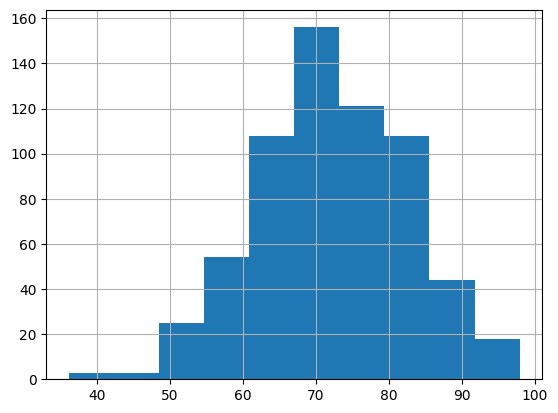

In [45]:
df['Literacy'].hist();

The Empirica Rule

- 68 percent of values fall within one standard deviation of the mean.
- 95 percent fall within two standard deviations of the mean.
- 99.7 percent fall within three standard deviations of the mean.

In [46]:
mean_overall_li =  df['Literacy'].mean()
mean_overall_li

72.308421875

In [47]:
std_overall_li =  df['Literacy'].std()
std_overall_li

10.488815587815504

1 standard deviation below and above the mean.

Mean - (1* Standard Deviation)

Mean + (1* Standard Deviation)

In [48]:
upper_limit = mean_overall_li + (1*std_overall_li)
upper_limit

82.7972374628155

In [49]:
lower_limit = mean_overall_li - (1*std_overall_li)
lower_limit

61.81960628718449

In [50]:
((df['Literacy'] >= lower_limit) & (df['Literacy'] <= upper_limit)).mean()

0.6578125

closer to 68%

In [51]:
def value(std):
    upper_limit = mean_overall_li + (std * std_overall_li)
    lower_limit = mean_overall_li - (std * std_overall_li)
    res = ((df['Literacy'] >= lower_limit) & (df['Literacy'] <= upper_limit)).mean()
    print(res)

In [52]:
value(2)

0.9515625


In [53]:
value(3)

0.9984375


Z Score

In [54]:
df['Z_score'] = stats.zscore(df['Literacy'])

In [55]:
df[(df['Z_score'] > 3) | (df['Z_score']< - 3)]

,District,State,Literacy,Z_score
497,Alirajpur,Madhya Pradesh,36.10,-3.454798
580,Bijapur,Chhattisgarh,40.86,-3.000627


This shows these states has z score lower than 3 standard deviation these are 2 outline districts

Govt should provide education on these parts of india

# Sampling Distributions

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as sm

In [57]:
population_mean = df['Literacy'].mean()
population_mean

72.308421875

In [58]:
sampled_data = df.sample(n=50,replace=True,random_state=31208)
sampled_data.head()

,District,State,Literacy,Z_score
615,Peren,Nagaland,77.95,0.538287
210,Jamnagar,Gujarat,73.65,0.128006
348,Jhalawar,Rajasthan,61.50,-1.031277
248,Bagalkot,Karnataka,68.82,-0.332845
276,Hisar,Haryana,72.89,0.055491


In [59]:
estimate_1 = sampled_data['Literacy'].mean()
estimate_1

70.79700000000001

In [60]:
estimate_2 = df['Literacy'].sample(n=50,replace=True,random_state=56810).mean()
estimate_2

71.621

In [61]:
estimate_list = []
for i in range(10000):
  estimate_list.append(df['Literacy'].sample(n=50,replace=True).mean())
estimate_df = pd.DataFrame(data={'estimate': estimate_list})

In [62]:
mean_sample_mean = estimate_df['estimate'].mean()
mean_sample_mean

72.29399957999999

# Confidence Intervals

In [84]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm

In [86]:
df = pd.read_csv(path)

In [87]:
df = df.dropna()

In [88]:
sample_data = df.sample(n=50,replace=True,random_state=31208)
sample_data.head()

,District,State,Literacy
615,Peren,Nagaland,77.95
210,Jamnagar,Gujarat,73.65
348,Jhalawar,Rajasthan,61.50
248,Bagalkot,Karnataka,68.82
276,Hisar,Haryana,72.89


Steps for constructing a confidence interval

- Identify a sample statistic
- Choose a confidence level
- Find a margin of error
- Calculate the interval

In [89]:
sample_mean = sample_data['Literacy'].mean()

In [90]:
sample_mean

70.79700000000001

In [91]:
estimated_standard_error = sampled_data['Literacy'].std()/np.sqrt(sample_data.shape[0])

In [92]:
estimated_standard_error

1.4482033415122848

In [93]:
stats.norm.interval(confidence=0.95, loc=sample_mean, scale=estimated_standard_error)

(67.95857360834538, 73.63542639165465)

The confidence Interval is between

73.63542639165465 - 67.95857360834538

In [96]:
ci_range = (73.63542639165465 - 67.95857360834538)
ci_range

5.676852783309272

In [103]:
def CI(value):
  CI = stats.norm.interval(confidence=value, loc=sample_mean, scale=estimated_standard_error)

  print(f'Interval Range : {CI}')


In [104]:
CI(0.95)

Interval Range : (67.95857360834538, 73.63542639165465)


# Hypothesis Testing

Statistical hypotheses
Let’s review the steps for conducting a hypothesis test:

- State the null hypothesis and the alternative hypothesis.

- Choose a significance level.

- Find the p-value.

- Reject or fail to reject the null hypothesis.

In [106]:
UP = df[df["State"] == "Uttar Pradesh"]
MP = df[df["State"] == "Madhya Pradesh"]

In [111]:
up_sample = UP.sample(n=50, random_state=13790,replace = True)
mp_sample = MP.sample(n=50, random_state=39103,replace = True)

In [115]:
up_sample['Literacy'].mean()

66.9592

In [116]:
mp_sample['Literacy'].mean()

67.3516

In [117]:
mp_sample['Literacy'].mean() - up_sample['Literacy'].mean()

0.3924000000000092

In [121]:
stats.ttest_ind(b=up_sample['Literacy'], a=mp_sample['Literacy'],equal_var=False)

TtestResult(statistic=0.2775144084930008, pvalue=0.7819731752772034, df=97.42382875727728)

Draw a Conclusion

- if p-value < significance level : Reject the null hypothesis
  - Statistically significant diffrence in literacy rates

- if p-value > significance level : fail to rejeect null hypothesis
  - No statistically significant diffrence in literacy rates


P -value : 0.78%
Significance level : 5%

0.78% < 5 %

Conclusion : Reject the null hypothesis.

There is a statistical diffrence in literacy rates.